In [116]:
# Import Dependencies
import requests as req
import json
from citipy import citipy
from random import uniform
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# API config info
api_key = "84fe59f3ffa1bf7920c39149bf3dde70"
url = "http://api.openweathermap.org/data/2.5/weather?"

In [118]:
## Generate random lng/lat to put into citipy (citipy take in 2 coordinates (lng, lat))

# Functions for generating random latitude
def rand_lat():
  return uniform(-90, 90)

# Function for generating random longitude
def rand_lng():
  return uniform(-180,180)

In [119]:
# Create df 
weather_data_df = pd.DataFrame(columns=["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Temperature", "Wind Speed"])

# Create initial variables for looping
counter = 0
unique_cities = []

# Initial print statements for output
print("Beginning Data Retrieval")
print("---------------------------")

# While loop to only capture cities without null weather data
while counter < 500:
    city = citipy.nearest_city(rand_lat(), rand_lng())
    query_url =  url + "appid=" + api_key + "&q=" + city.city_name + "," + city.country_code + "&units=imperial"
    weather_response = req.get(query_url)
    weather_json = weather_response.json()

    if weather_json["cod"] == 200:
        # check for duplicates
        if weather_json["name"] not in unique_cities:
            # Append to df
            weather_data_df = weather_data_df.append([{"City": weather_json["name"],
                                                       "Temperature": weather_json["main"]["temp"],
                                                       "Humidity": weather_json["main"]["humidity"],
                                                       "Cloudiness": weather_json["clouds"]["all"],
                                                       "Wind Speed": weather_json["wind"]["speed"],
                                                       "Lat": weather_json["coord"]["lat"],
                                                       "Country": weather_json["sys"]["country"],
                                                       "Lng": weather_json["coord"]["lon"],
                                                       "Date": weather_json["dt"]
                                                      }])
            
            # Add to city-weather data confirmed counter         
            counter += 1
            
            unique_cities.append(weather_json["name"])
        
            # print output statements
            print("Processing Record #" + str(counter) + " | City ID: " + str(weather_json["id"]) + " | City Name: " + city.city_name)
            print(query_url)


Beginning Data Retrieval
---------------------------
Processing Record #1 | City ID: 2077963 | City Name: albany
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=albany,au&units=imperial
Processing Record #2 | City ID: 546105 | City Name: nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=nikolskoye,ru&units=imperial
Processing Record #3 | City ID: 4036284 | City Name: alofi
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=alofi,nu&units=imperial
Processing Record #4 | City ID: 3663142 | City Name: novo aripuana
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=novo aripuana,br&units=imperial
Processing Record #5 | City ID: 3652764 | City Name: puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=puerto ayora,ec&units=imperial
Processing Record #6 | City ID: 3369157 | City Name

Processing Record #47 | City ID: 2618795 | City Name: klaksvik
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=klaksvik,fo&units=imperial
Processing Record #48 | City ID: 2729907 | City Name: longyearbyen
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=longyearbyen,sj&units=imperial
Processing Record #49 | City ID: 5380437 | City Name: pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=pacific grove,us&units=imperial
Processing Record #50 | City ID: 2284647 | City Name: man
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=man,ci&units=imperial
Processing Record #51 | City ID: 1634614 | City Name: nabire
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=nabire,id&units=imperial
Processing Record #52 | City ID: 2013918 | City Name: ust-maya
http://api.openweathermap.org/data/2.5/weat

Processing Record #93 | City ID: 2027296 | City Name: aykhal
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=aykhal,ru&units=imperial
Processing Record #94 | City ID: 142679 | City Name: astaneh-ye ashrafiyeh
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=astaneh-ye ashrafiyeh,ir&units=imperial
Processing Record #95 | City ID: 2688368 | City Name: norrkoping
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=norrkoping,se&units=imperial
Processing Record #96 | City ID: 3698359 | City Name: chicama
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=chicama,pe&units=imperial
Processing Record #97 | City ID: 2449893 | City Name: tessalit
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=tessalit,ml&units=imperial
Processing Record #98 | City ID: 64814 | City Name: bandarbeyla
http://api.openweatherm

Processing Record #139 | City ID: 2027244 | City Name: bagdarin
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=bagdarin,ru&units=imperial
Processing Record #140 | City ID: 2294915 | City Name: takoradi
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=takoradi,gh&units=imperial
Processing Record #141 | City ID: 2522857 | City Name: tricase
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=tricase,it&units=imperial
Processing Record #142 | City ID: 6169587 | City Name: truro
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=truro,ca&units=imperial
Processing Record #143 | City ID: 3994534 | City Name: ocampo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ocampo,mx&units=imperial
Processing Record #144 | City ID: 3573197 | City Name: hamilton
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record #185 | City ID: 518346 | City Name: novopetrovskoye
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=novopetrovskoye,ru&units=imperial
Processing Record #186 | City ID: 108410 | City Name: riyadh
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=riyadh,sa&units=imperial
Processing Record #187 | City ID: 1788269 | City Name: jinxi
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=jinxi,cn&units=imperial
Processing Record #188 | City ID: 5882953 | City Name: aklavik
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=aklavik,ca&units=imperial
Processing Record #189 | City ID: 2112539 | City Name: iwaki
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=iwaki,jp&units=imperial
Processing Record #190 | City ID: 3863379 | City Name: mar del plata
http://api.openweathermap.org/data/2.5/wea

Processing Record #231 | City ID: 3113236 | City Name: ponferrada
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=ponferrada,es&units=imperial
Processing Record #232 | City ID: 2185329 | City Name: waipawa
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=waipawa,nz&units=imperial
Processing Record #233 | City ID: 5574991 | City Name: boulder
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=boulder,us&units=imperial
Processing Record #234 | City ID: 2070998 | City Name: geraldton
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=geraldton,au&units=imperial
Processing Record #235 | City ID: 107304 | City Name: buraydah
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=buraydah,sa&units=imperial
Processing Record #236 | City ID: 3883457 | City Name: lebu
http://api.openweathermap.org/data/2.5/weath

Processing Record #277 | City ID: 94787 | City Name: kirkuk
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kirkuk,iq&units=imperial
Processing Record #278 | City ID: 3402648 | City Name: carutapera
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=carutapera,br&units=imperial
Processing Record #279 | City ID: 2181625 | City Name: te anau
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=te anau,nz&units=imperial
Processing Record #280 | City ID: 3466165 | City Name: cidreira
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=cidreira,br&units=imperial
Processing Record #281 | City ID: 2065594 | City Name: mount isa
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=mount isa,au&units=imperial
Processing Record #282 | City ID: 2077895 | City Name: alice springs
http://api.openweathermap.org/data/2.5

Processing Record #323 | City ID: 1520172 | City Name: mikhaylovka
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=mikhaylovka,kz&units=imperial
Processing Record #324 | City ID: 8125787 | City Name: bobcaygeon
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=bobcaygeon,ca&units=imperial
Processing Record #325 | City ID: 934479 | City Name: grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=grand gaube,mu&units=imperial
Processing Record #326 | City ID: 359792 | City Name: aswan
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=aswan,eg&units=imperial
Processing Record #327 | City ID: 334700 | City Name: hirna
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=hirna,et&units=imperial
Processing Record #328 | City ID: 2125906 | City Name: dukat
http://api.openweathermap.org/data/2.5/weat

Processing Record #369 | City ID: 5847486 | City Name: kailua
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kailua,us&units=imperial
Processing Record #370 | City ID: 157738 | City Name: kigoma
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kigoma,tz&units=imperial
Processing Record #371 | City ID: 4002745 | City Name: pueblo nuevo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=pueblo nuevo,mx&units=imperial
Processing Record #372 | City ID: 583578 | City Name: aktanysh
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=aktanysh,ru&units=imperial
Processing Record #373 | City ID: 2294915 | City Name: sekondi
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=sekondi,gh&units=imperial
Processing Record #374 | City ID: 3137469 | City Name: sorland
http://api.openweathermap.org/data/2.5/weather

Processing Record #415 | City ID: 3696417 | City Name: huanuco
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=huanuco,pe&units=imperial
Processing Record #416 | City ID: 1337607 | City Name: kudahuvadhoo
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=kudahuvadhoo,mv&units=imperial
Processing Record #417 | City ID: 503977 | City Name: marfino
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=marfino,ru&units=imperial
Processing Record #418 | City ID: 6690296 | City Name: saint-joseph
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=saint-joseph,re&units=imperial
Processing Record #419 | City ID: 3404766 | City Name: buique
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=buique,br&units=imperial
Processing Record #420 | City ID: 5969025 | City Name: haines junction
http://api.openweathermap.o

Processing Record #461 | City ID: 5859699 | City Name: college
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=college,us&units=imperial
Processing Record #462 | City ID: 2313002 | City Name: matadi
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=matadi,cd&units=imperial
Processing Record #463 | City ID: 1028434 | City Name: quelimane
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=quelimane,mz&units=imperial
Processing Record #464 | City ID: 1835848 | City Name: seoul
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=seoul,kr&units=imperial
Processing Record #465 | City ID: 608270 | City Name: shubarshi
http://api.openweathermap.org/data/2.5/weather?appid=84fe59f3ffa1bf7920c39149bf3dde70&q=shubarshi,kz&units=imperial
Processing Record #466 | City ID: 964712 | City Name: plettenberg bay
http://api.openweathermap.org/data/2.5/weath

In [120]:
weather_data_df.count()

City           500
Cloudiness     500
Country        500
Date           500
Humidity       500
Lat            500
Lng            500
Temperature    500
Wind Speed     500
dtype: int64

In [121]:
# NOT NEEDED for 
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Temperature,Wind Speed
0,Albany,0,AU,1519880767,47,-35.02,117.88,82.83,6.73
0,Nikolskoye,20,RU,1519878600,76,59.70,30.79,-9.41,2.93
0,Alofi,88,NU,1519876800,70,-19.06,-169.92,84.20,6.93
0,Novo Aripuana,36,BR,1519880811,92,-5.12,-60.38,76.49,2.26
0,Puerto Ayora,20,EC,1519880999,100,-0.74,-90.35,76.08,2.15


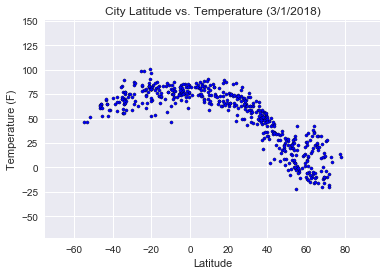

In [122]:
### Create the necessary graphs from the data frame

## Temperature (F) vs. Latitude
plt.title("City Latitude vs. Temperature (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Temperature"])-50, max(weather_data_df["Temperature"]) + 50)


plt.scatter(weather_data_df["Lat"], weather_data_df["Temperature"], s =10, edgecolor = "black", c = "blue")
sns.set()
plt.show()

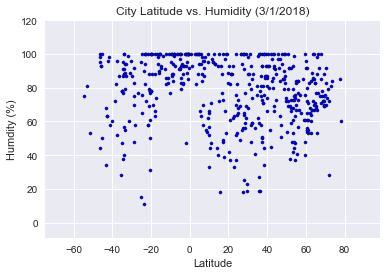

In [123]:
## Humidity (%) vs. Latitude
plt.title("City Latitude vs. Humidity (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Humdity (%)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Humidity"])-20, max(weather_data_df["Humidity"]) + 20)


plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], s =10, edgecolor = "black", c = "blue")
sns.set()
plt.show()

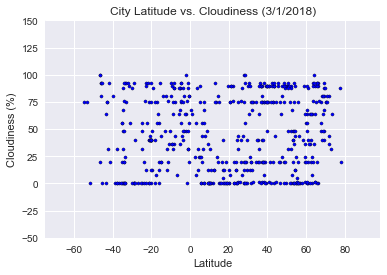

In [124]:
## Cloudiness (%) vs. Latitude
plt.title("City Latitude vs. Cloudiness (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Cloudiness"])-50, max(weather_data_df["Cloudiness"]) + 50)


plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], s =10, edgecolor = "black", c = "blue")
sns.set()
plt.show()

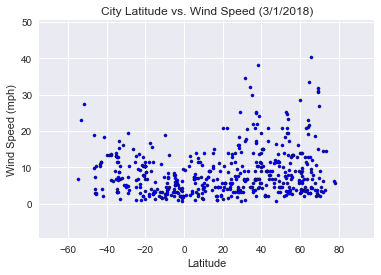

In [125]:
## Wind Speed (mph) vs. Latitude
plt.title("City Latitude vs. Wind Speed (3/1/2018)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.xlim(min(weather_data_df["Lat"])-20, max(weather_data_df["Lat"]) + 20)
plt.ylim(min(weather_data_df["Wind Speed"])-10, max(weather_data_df["Wind Speed"]) + 10)


plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], s =10, edgecolor = "black", c = "blue")
sns.set()
plt.show()

In [126]:
# Output to csv
weather_data_df.to_csv("weather_data.csv", encoding="utf-8", index=False)